#ЛР 8 Disbalanced
Булатова Ксения

Группа: ПМИ - 24 НМ

Для работы были взяты данные из ЛР7

Файл [criteo_full.csv](https://drive.google.com/file/d/1JtVCGuqFhXlyFTzgjzSVFi-LGwF27f9X/view?usp=drive_link)

Файл [criteo_short.csv](https://drive.google.com/file/d/1oflPS05sP-JBiFygDITVdughnzVRb5x_/view?usp=drive_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загружаем данные

In [ ]:
new_df=pd.read_csv('/content/drive/MyDrive/data/criteo_short.csv')

new_df.head()

,Unnamed: 0,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,11064543,15.091467,10.059654,8.487371,1.114982,10.280525,4.115453,-8.693224,4.833815,3.815541,37.291929,5.300375,-0.168679,1,0,0,1
1,9053335,12.616365,10.059654,8.869961,4.679882,10.280525,4.115453,0.294443,4.833815,3.920995,13.190056,5.300375,-0.168679,1,0,0,0
2,10610568,13.024494,10.059654,8.305281,1.614662,10.280525,4.115453,-13.233344,4.833815,3.773308,44.560800,5.300375,-0.168679,1,0,1,1
3,1292723,15.676827,10.059654,8.467982,2.934780,10.280525,4.115453,-3.282109,4.833815,3.955396,16.226044,5.300375,-0.168679,1,0,0,1
4,651272,17.107571,10.059654,9.008447,1.815324,10.280525,4.115453,-15.621385,4.833815,3.934656,13.190056,5.300375,-0.168679,1,0,1,1


In [ ]:
new_df.describe()

,Unnamed: 0,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,3.244300e+04,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000,32443.000000
mean,7.523903e+06,16.132699,10.143876,8.473055,2.499476,10.512148,3.774170,-7.636403,5.300208,3.893207,21.093673,5.388295,-0.181163,0.931973,0.032426,0.254385,0.563203
std,3.987716e+06,3.777501,0.307524,0.269838,2.497848,0.753983,0.986074,6.461196,1.276503,0.073832,10.907450,0.254126,0.058639,0.251796,0.177132,0.435521,0.495997
min,1.700000e+01,12.616365,10.059654,8.214383,-6.198938,10.280525,-5.390942,-26.302579,4.833815,3.649367,13.190056,5.300375,-1.190080,0.000000,0.000000,0.000000,0.000000
25%,3.993897e+06,12.708378,10.059654,8.214383,0.719526,10.280525,4.115453,-12.781218,4.833815,3.834451,13.190056,5.300375,-0.168679,1.000000,0.000000,0.000000,0.000000
50%,8.548383e+06,14.389674,10.059654,8.371181,3.359763,10.280525,4.115453,-7.301017,4.833815,3.906514,13.190056,5.300375,-0.168679,1.000000,0.000000,0.000000,1.000000
75%,1.070470e+07,19.257031,10.059654,8.698229,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,28.276981,5.300375,-0.168679,1.000000,0.000000,1.000000,1.000000
max,1.397917e+07,23.903730,14.345315,9.051843,4.679882,20.163205,4.115453,0.294443,10.348001,3.971858,64.090777,6.473645,-0.168679,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/criteo_full.csv')
df.head()

,Unnamed: 0,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,8740642,24.400071,10.059654,8.913039,4.679882,10.280525,4.115453,-1.288207,4.833815,3.927254,13.190056,5.300375,-0.168679,1,0,0,0
1,11416031,22.530524,10.059654,8.877854,4.679882,10.280525,3.013064,-13.469979,11.972993,3.934656,13.190056,5.300375,-0.168679,1,0,0,0
2,10257367,12.616365,10.059654,8.538822,4.679882,10.280525,4.115453,0.294443,4.833815,3.804295,39.256426,5.300375,-0.168679,0,0,0,0
3,5556519,25.929963,10.059654,8.867776,4.679882,10.280525,4.115453,-5.987667,4.833815,3.876391,13.190056,5.300375,-0.168679,1,0,0,0
4,1437042,21.937528,10.059654,8.214383,4.679882,10.280525,4.115453,-5.116672,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [ ]:
df.describe()

,Unnamed: 0,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,6.989800e+05,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000,698980.000000
mean,6.988771e+06,19.623926,10.070000,8.446671,4.178571,10.338690,4.028628,-4.153449,5.101469,3.933565,16.023124,5.333452,-0.170960,0.849372,0.002960,0.047004,0.030590
std,4.033815e+06,5.377777,0.104561,0.299305,1.336796,0.343023,0.429776,4.574302,1.204745,0.056658,7.010182,0.168459,0.022796,0.357686,0.054326,0.211648,0.172205
min,1.700000e+01,12.616365,10.059654,8.214383,-7.443604,10.280525,-7.061297,-29.219854,4.833815,3.640858,13.190056,5.300375,-1.190080,0.000000,0.000000,0.000000,0.000000
25%,3.499842e+06,12.616365,10.059654,8.214383,4.679882,10.280525,4.115453,-6.699321,4.833815,3.910792,13.190056,5.300375,-0.168679,1.000000,0.000000,0.000000,0.000000
50%,6.980972e+06,21.925312,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,1.000000,0.000000,0.000000,0.000000
75%,1.048233e+07,24.449764,10.059654,8.724649,4.679882,10.280525,4.115453,0.294443,4.833815,3.971858,13.190056,5.300375,-0.168679,1.000000,0.000000,0.000000,0.000000
max,1.397959e+07,26.745255,15.126244,9.051961,4.679882,20.163205,4.115453,0.294443,11.998301,3.971858,65.317477,6.473905,-0.168679,1.000000,1.000000,1.000000,1.000000


Работаем с сбалансироваными данными

Разделим его на обучающий и тестовый наборы

In [ ]:
X = new_df.drop('exposure', axis=1)
y = new_df['exposure']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Выберем несколько простых моделей из библиотеки sklearn


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),  # Логистическая регрессия
    "KNearest": SVC(),  # Метод опорных векторов
    "Support Vector Classifier": KNeighborsClassifier(),# Метод ближайших соседей
    "DecisionTreeClassifier": DecisionTreeClassifier() # Решающее дерево
}

Разобьем обучающую выборку на 5 фолдов и обучим модели

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  LogisticRegression получила на обучающей выборке 80.0 % accuracy score
Модель  SVC получила на обучающей выборке 56.00000000000001 % accuracy score
Модель  KNeighborsClassifier получила на обучающей выборке 60.0 % accuracy score
Модель  DecisionTreeClassifier получила на обучающей выборке 81.0 % accuracy score


Модель решающие деревья на обучающей выборке получила более точный результат 81%

Для улучшения качества моделей используем метод GridSearchCV.


In [ ]:
# Используем поиск по сетке для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Выбираем лучшую модель
log_reg = grid_log_reg.best_estimator_ #  для Логистическая регрессия

# Метод ближайших соседей
knears_params = {"n_neighbors": list(range(2,7,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_# для  K ближайший соседей

# Метод опорных векторов
x = [1.0, 1000.0]
y = [0.9]
z = [4]
svc_params=[
            {'C': x,'kernel': ['rbf'],'gamma': y} ,
            {'C': x,'kernel': ['poly'],'gamma': y,'degree': z}
           ]
grid_svc=GridSearchCV(estimator = SVC(),
                        param_grid = svc_params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_#  для SVM

# Решающее дерево
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_#  для решающий деревьев

Проверим как изменились метрики

In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  79.91%
Knears Neighbors Cross Validation Score 60.28%
Support Vector Classifier Cross Validation Score 56.33%
DecisionTree Classifier Cross Validation Score 86.32%


Видим, что показатели стали лучше

###Метод NearMiss (undersampling)

In [ ]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

undersample_X = df.drop('exposure', axis=1)
undersample_y = df['exposure']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)#

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Метод NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))
# Использовать сэмплирование будем во время кросс-валидации

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({0: 21382, 1: 21382})


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

Построим кривую обучение каждой из модели.

In [ ]:
def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Первая модель
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)#
    train_scores_mean = np.mean(train_scores, axis=1)#
    train_scores_std = np.std(train_scores, axis=1)#
    test_scores_mean = np.mean(test_scores, axis=1)#
    test_scores_std = np.std(test_scores, axis=1)#
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Размер выборки')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Вторая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Размер выборки')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")


    # Третья модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Размер выборки')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")


    # Четвертая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Размер выборки')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

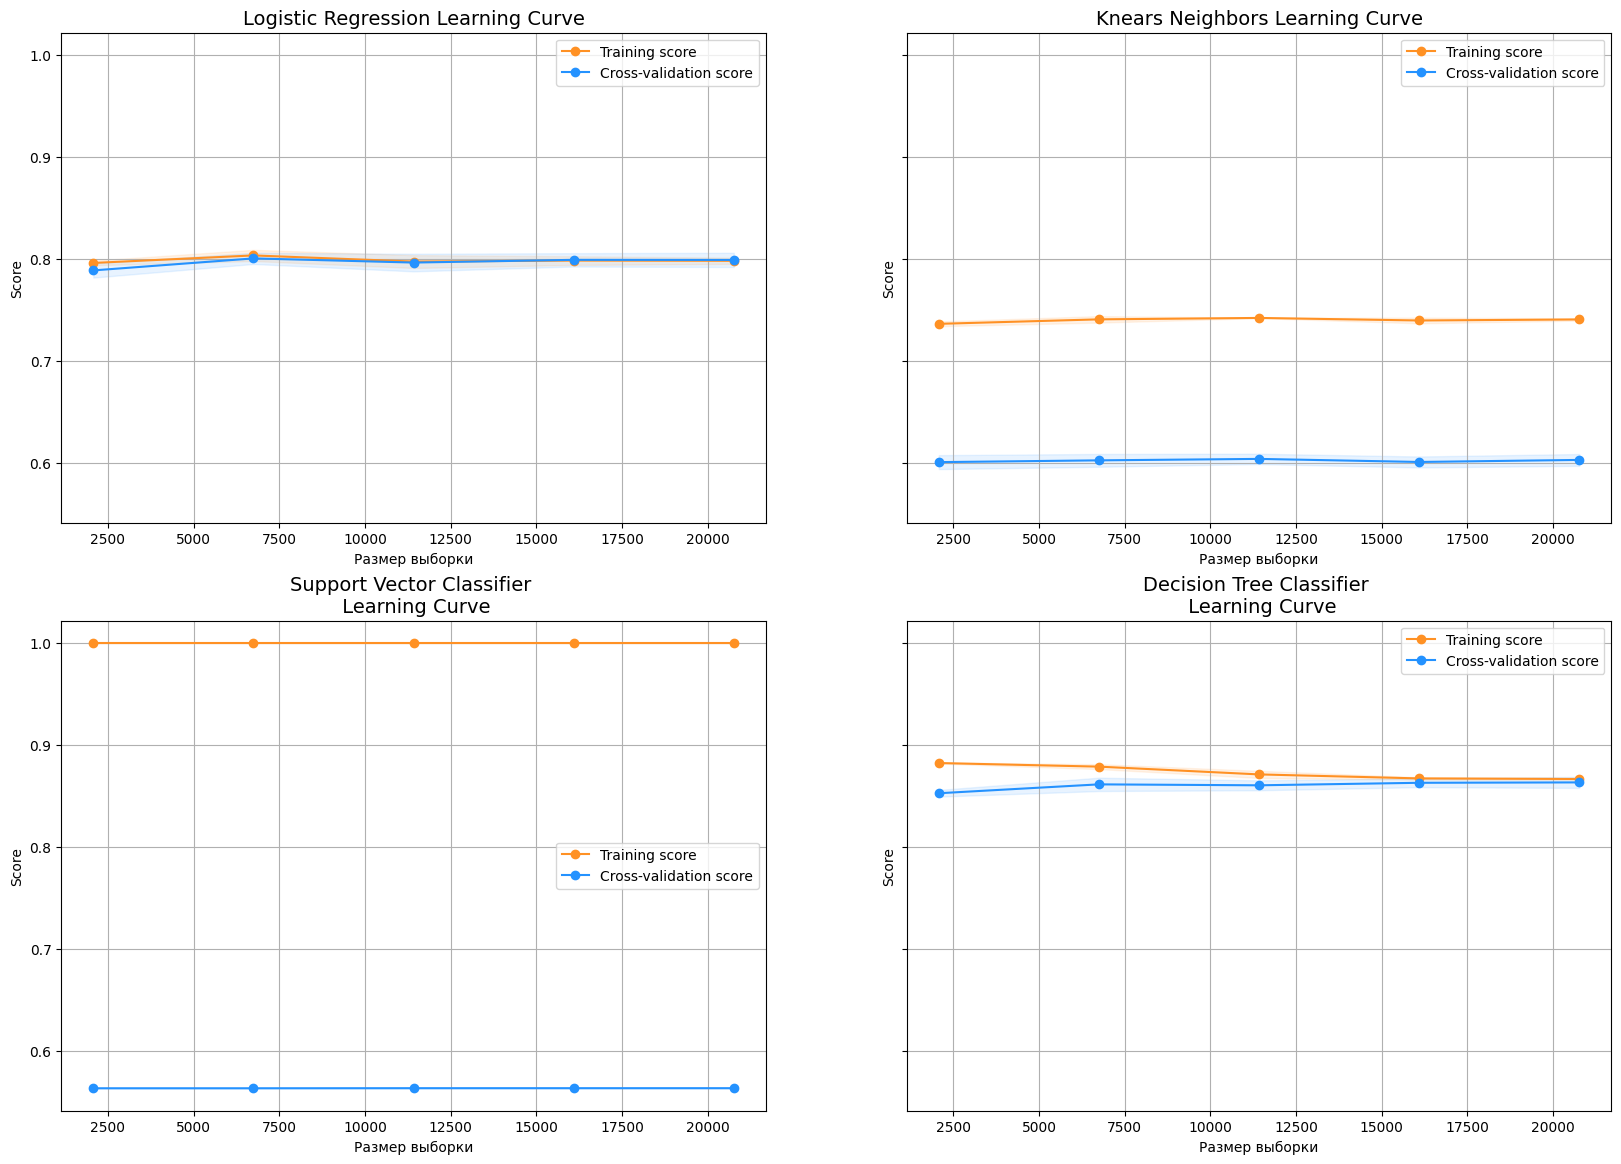

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train)

Логистическая регрессия показала результаты лучше других

In [ ]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.8786958077362811
KNears Neighbors:  0.5868402338118108
Support Vector Classifier:  0.5001057250035089
Decision Tree Classifier:  0.8566701847385728


#### Построим ROC кривую

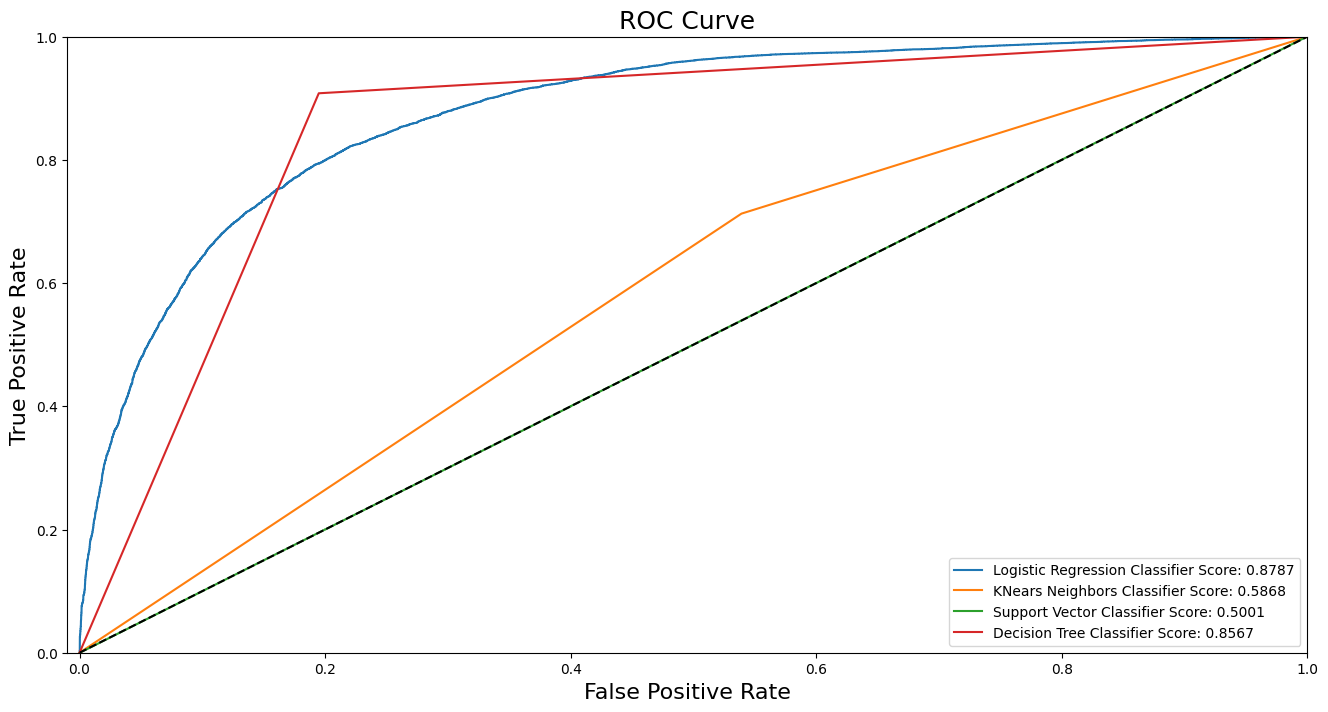

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)#
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)#
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)#
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)#


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

### SMOTE метод (Over-Sampling):

Снова распределим классы на обучающий и тестовый наборы

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('exposure', axis=1)
y = df['exposure']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.96938038 0.03061962]
Тестовый набор: [0.96952703 0.03047297]


Сохраняем параметры классификаторов, на которых были лучшие результаты методом GridSearchCV.

In [ ]:
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knears Neighbors": knears_neighbors,
    "DecisionTreeClassifier": tree_clf
}

for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 79.91%
Knears Neighbors Cross Validation Score: 60.28%
DecisionTreeClassifier Cross Validation Score: 86.32%


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

X = df.drop('exposure', axis=1)
y = df['exposure']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

over = SMOTE(sampling_strategy=0.2,k_neighbors=5)

under = RandomUnderSampler(sampling_strategy=0.6)

for key, classifier in tuned_classifiers.items():

    steps=[('o',over),('u',under),('model',classifier)]

    FiPipeline=Pipeline(steps=steps)

    scores=cross_val_score(FiPipeline,X,y,cv=sss)

    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: LogisiticRegression Has a training score of, 89.55 % accuracy score
Classifiers: Knears Neighbors Has a training score of, 76.25 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 92.16 % accuracy score


In [ ]:
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.2)),
        ('Random',RandomUnderSampler(sampling_strategy=0.6)),
        ('classification', tree_clf)
    ])

SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

tree_clf_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)

print(f'DecisionTreeClassifier Cross Validation Score: {round(tree_clf_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=9, sampling_strategy=0.2)),
                ('Random', RandomUnderSampler(sampling_strategy=0.6)),
                ('classification',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=5))])
0.9194504971665767
{'sampling__k_neighbors': 9}
DecisionTreeClassifier Cross Validation Score: 91.2%


In [ ]:
labels = ['No target action', 'Target action']

best_est = SMOTE_KN.best_estimator_
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

                  precision    recall  f1-score   support

No target action       0.99      0.92      0.95    135519
   Target action       0.22      0.67      0.33      4277

        accuracy                           0.91    139796
       macro avg       0.60      0.80      0.64    139796
    weighted avg       0.97      0.91      0.94    139796



In [ ]:
y_score = best_est.predict(original_Xtest)

Применим SMOTE после кросс-валидации

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
t0 = time.time()
tree_clf_sm =grid_tree.best_estimator_
tree_clf_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 17.25898241996765 сек


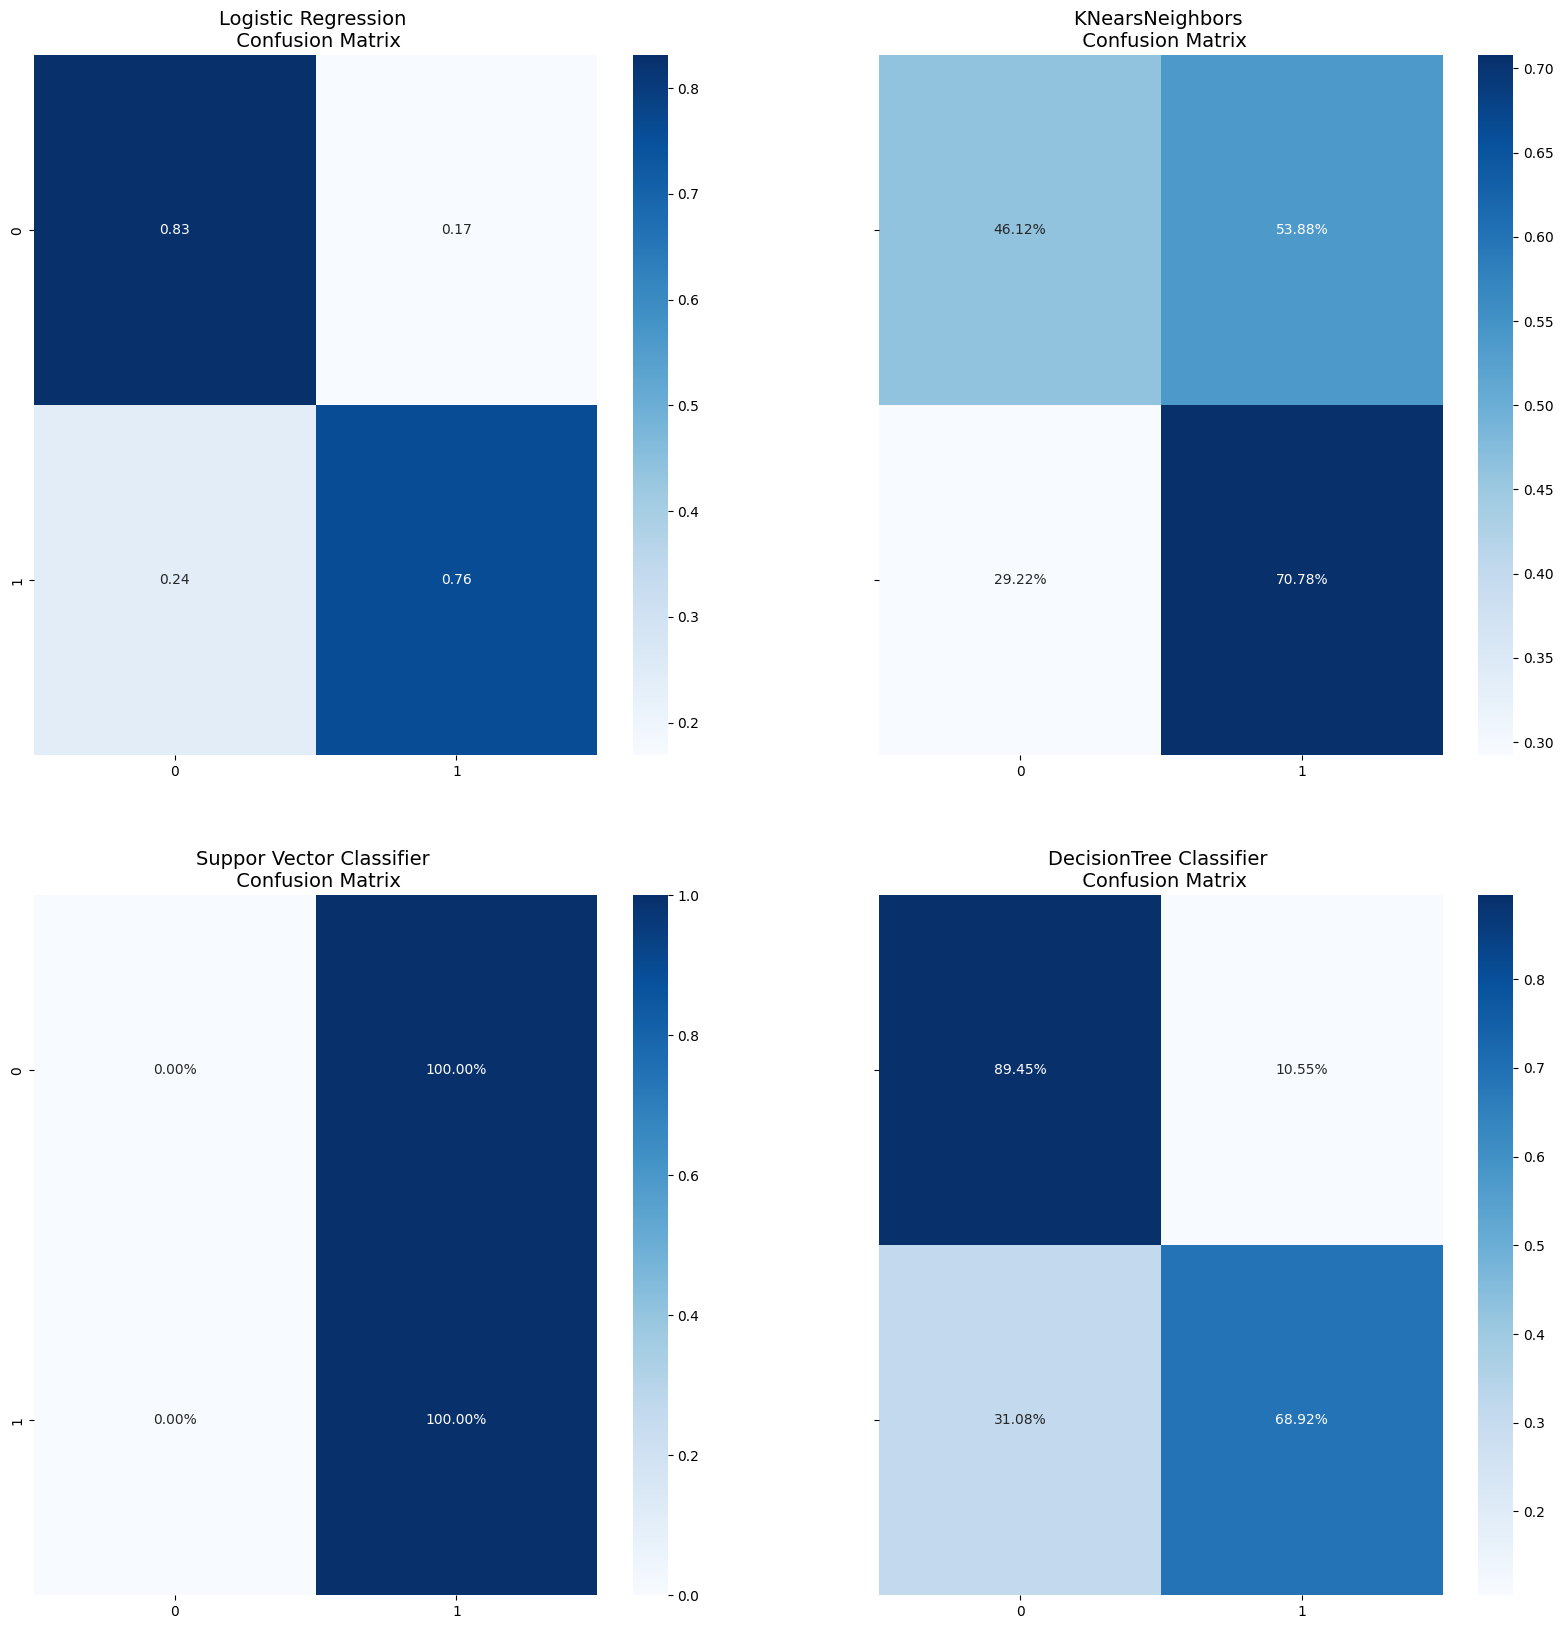

In [ ]:
y_pred_tree= best_est.predict(X_test)

# Другие модели
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(y_test, y_pred_knear, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc, normalize='true')
tree_cf = confusion_matrix(y_test, y_pred_tree, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax2,data=kneighbors_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


#
sns.heatmap(ax=ax3, data=svc_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax4, data=tree_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

In [ ]:
from sklearn.metrics import classification_report



print('Logistic Regression:')
#
y_pred= log_reg.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('KNears Neighbors:')
#
y_pred=  knears_neighbors.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Support Vector Classifier:')
#
y_pred=  svc.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Decision Tree Classifier:')
#
y_pred=  best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

Logistic Regression:
                  precision    recall  f1-score   support

No target action       0.99      0.86      0.92    135519
   Target action       0.14      0.74      0.24      4277

        accuracy                           0.86    139796
       macro avg       0.57      0.80      0.58    139796
    weighted avg       0.96      0.86      0.90    139796

KNears Neighbors:
                  precision    recall  f1-score   support

No target action       0.99      0.47      0.64    135519
   Target action       0.04      0.79      0.09      4277

        accuracy                           0.48    139796
       macro avg       0.52      0.63      0.36    139796
    weighted avg       0.96      0.48      0.62    139796

Support Vector Classifier:
                  precision    recall  f1-score   support

No target action       1.00      0.00      0.00    135519
   Target action       0.03      1.00      0.06      4277

        accuracy                           0.03    13979

Модель Decision Tree Classifier взяла в качестве основной модели. Сравним ее качество в случае подхода under-sampling и в случае over-sampling.

In [ ]:
# Решаюшие деревья с under-sampling
y_pred = tree_clf.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Решаюшие деревья с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.894654
1,Oversampling (SMOTE),0.914797


Oversampling (SMOTE) показала наилучший результат